In [10]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import scipy as sp
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df_transformacion= pd.read_csv("C:/Users/bruno/Desktop/PROYECTO FINAL_COLABORACION/Proyecto_Final_Grupo_2/datos_limpios.csv") #leer el archivo

In [32]:
#PARTE DOS
df_transformacion=df_transformacion.copy()

In [33]:
print(df_transformacion.columns.tolist())

['inventoryid', 'store', 'city', 'brand', 'description', 'size', 'onhand', 'price', 'enddate']


In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df_GRAFICOS_COMPARATIVOS_UNO['price'].hist(bins=20)
plt.title('Distribución de precios')

plt.subplot(1,2,2)
df_GRAFICOS_COMPARATIVOS_UNO['onhand'].hist(bins=20)
plt.title('Distribución de stock')

plt.show()



In [24]:
df_GRAFICOS_COMPARATIVOS_UNO["brand"].unique()

array([   58,    62,    63, ..., 14682, 25958, 36079], shape=(9653,))

In [25]:
df_GRAFICOS_COMPARATIVOS_UNO["store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81])

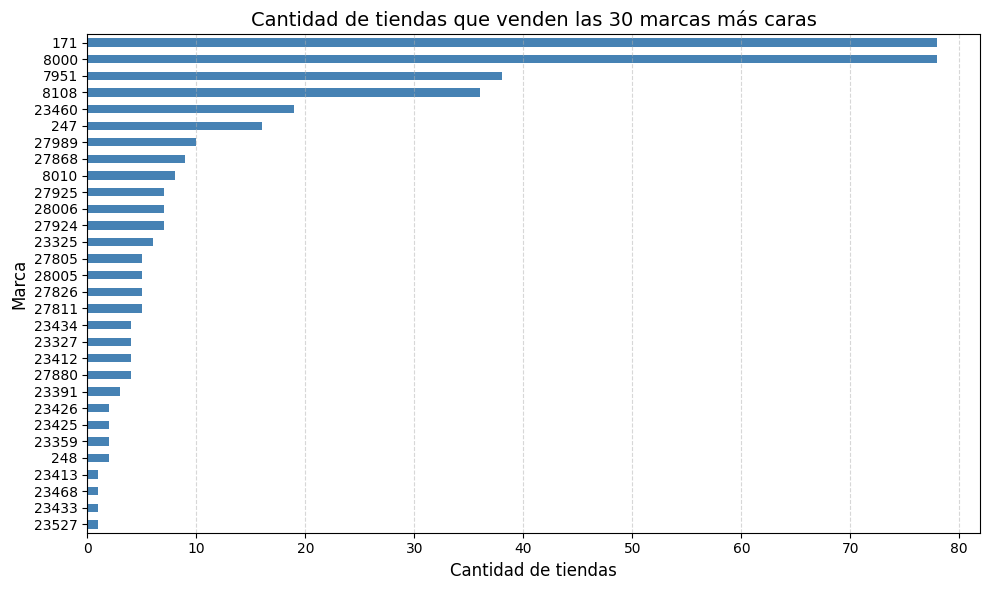

In [26]:
import matplotlib.pyplot as plt

# Calcular las 30 marcas más caras
top30_marcas = (
    df_GRAFICOS_COMPARATIVOS_UNO.groupby('brand')['price']
      .mean()
      .sort_values(ascending=False)
      .head(30)
      .index
)

# Filtrar el DataFrame con esas marcas
df_top30 = df_GRAFICOS_COMPARATIVOS_UNO[df_GRAFICOS_COMPARATIVOS_UNO['brand'].isin(top30_marcas)]

# Calcular cuántas tiendas distintas tienen cada una
marcas_tiendas = (
    df_top30.groupby('brand')['store']
    .nunique()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
marcas_tiendas.plot(kind='barh', color='steelblue')
plt.title('Cantidad de tiendas que venden las 30 marcas más caras', fontsize=14)
plt.xlabel('Cantidad de tiendas', fontsize=12)
plt.ylabel('Marca', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


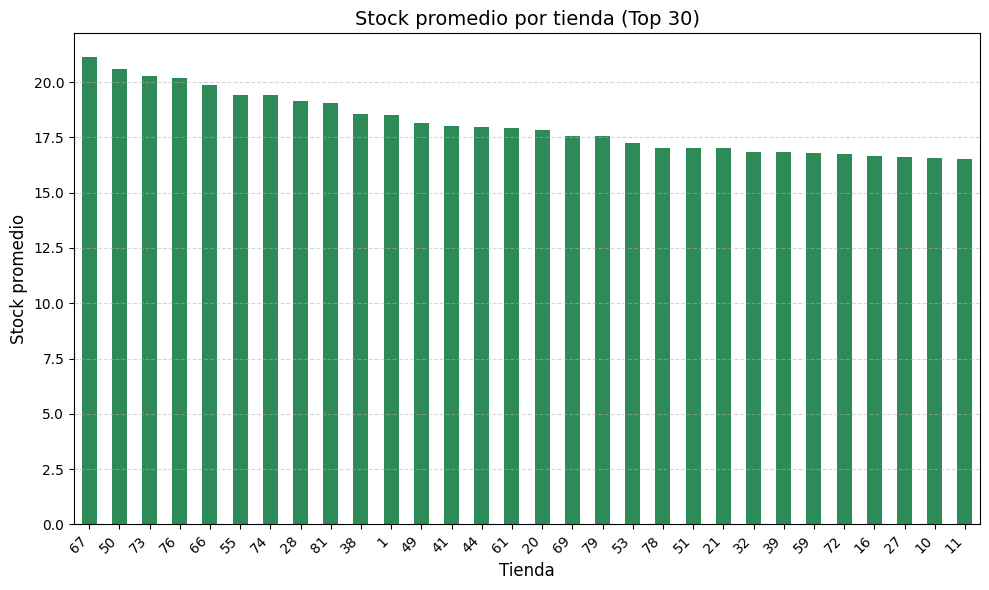

In [27]:
# Promedio de stock por tienda, stock expresado en unidades.
stock_tienda = (
    df_GRAFICOS_COMPARATIVOS_UNO.groupby('store')['onhand']
      .mean()
      .sort_values(ascending=False)
)

# Si hay muchas tiendas, limitamos
top_tiendas = stock_tienda.head(30)

plt.figure(figsize=(10,6))
top_tiendas.plot(kind='bar', color='seagreen')
plt.title('Stock promedio por tienda (Top 30)', fontsize=14)
plt.ylabel('Stock promedio', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [28]:
#identificamos las 20 tiendas con mas stock, como en el paso anterior.
#usamos las marcas mas caras
top15_marcas = (
    df_GRAFICOS_COMPARATIVOS_UNO.groupby('brand')['price']
      .mean()
      .sort_values(ascending=False)
      .head(20)
      .index
)

top_tiendas = stock_tienda.head(20).index  # podés ajustar cuántas usar

df_filtro = df_GRAFICOS_COMPARATIVOS_UNO[
    df_GRAFICOS_COMPARATIVOS_UNO['brand'].isin(top15_marcas) &
    df_GRAFICOS_COMPARATIVOS_UNO['store'].isin(top_tiendas)
]




In [ ]:
#PIVOT sirve para transformar el dataframe en una tabla
pivot_stock = (
    df_filtro.pivot_table(
        index='store',       # filas → cada tienda
        columns='brand',     # columnas → cada marca
        values='onhand',      # valores → stock
        aggfunc='sum',       # sumamos el stock
        fill_value=0
    )
)

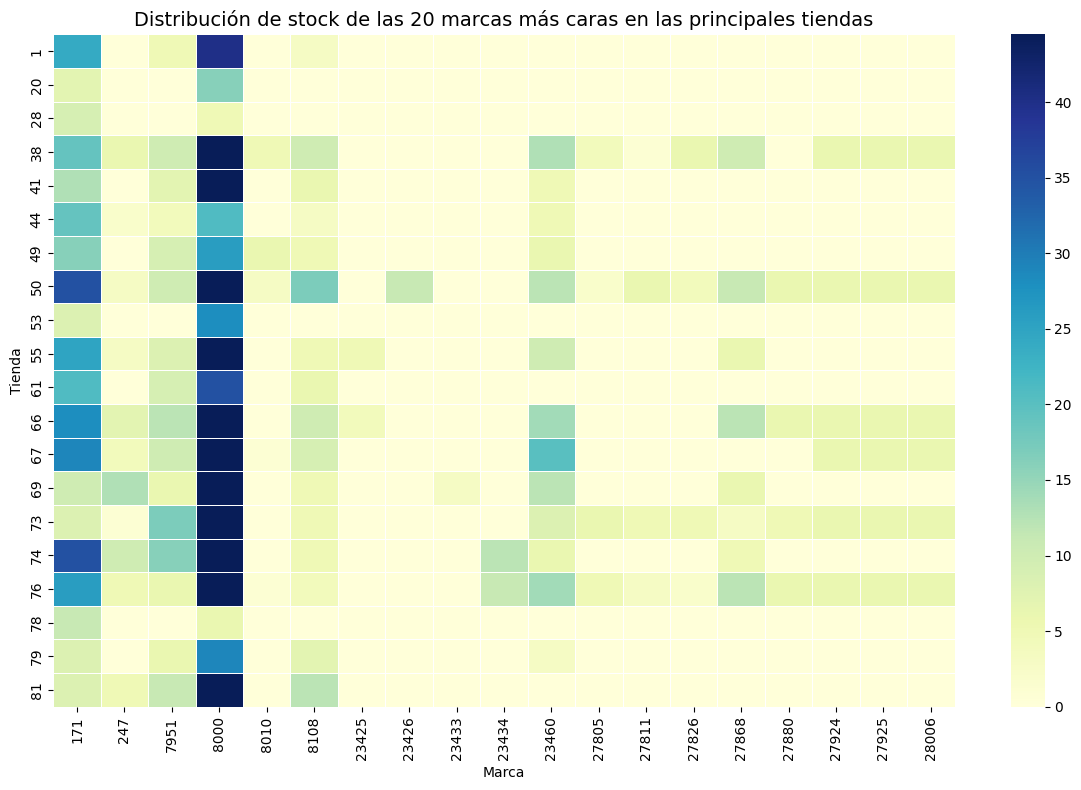

In [30]:

plt.figure(figsize=(12,8))
sns.heatmap(pivot_stock, cmap='YlGnBu', linewidths=.5)
plt.title('Distribución de stock de las 20 marcas más caras en las principales tiendas', fontsize=14)
plt.xlabel('Marca')
plt.ylabel('Tienda')
plt.tight_layout()
plt.show()

In [ ]:
#Cuanto más oscuro el color, más stock tiene esa marca en esa tienda.

In [106]:
#Guardar dataframe DTL
df_winsor_partedos.to_csv('marcas_top30.csv', index=False, encoding='utf-8')
